In [1]:
!pip install PyEMD


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 17.0 MB/s eta 0:00:00


<ipython-input-2-e8e65d11aac3>:40: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spline = UnivariateSpline(energy, y, s=0.5)


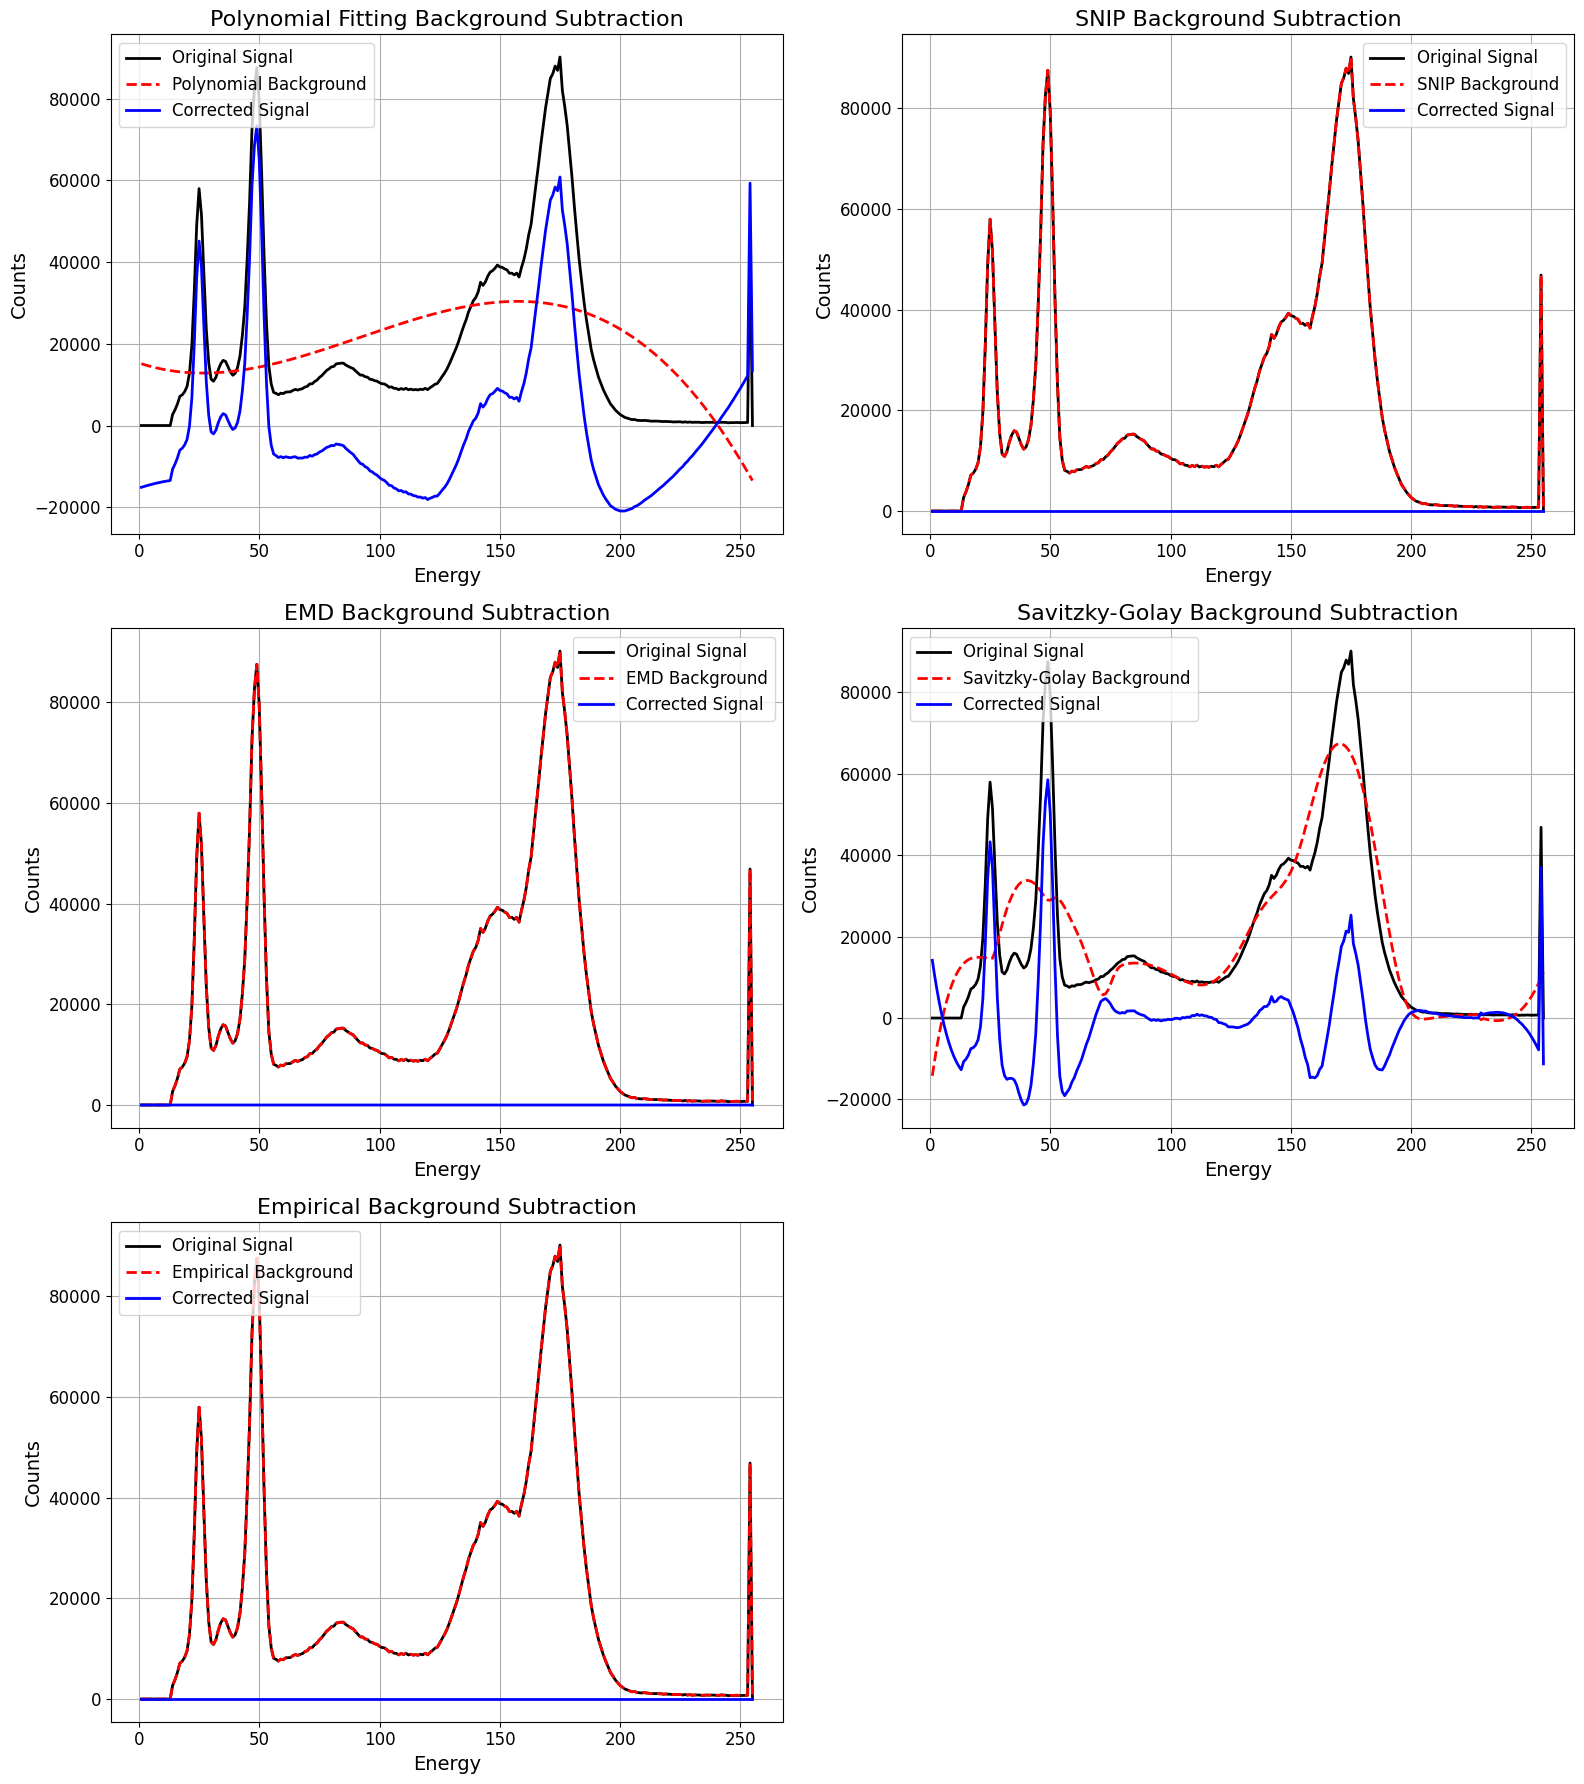

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.interpolate import UnivariateSpline

# Load the data
data = pd.read_csv('15.5.csv')
energy = data.iloc[:, 0].values
counts = data.iloc[:, 1].values

# 1. Polynomial Fitting
def polynomial_fitting(x, y, degree=3):
    coeff = np.polyfit(x, y, degree)
    poly = np.poly1d(coeff)
    background = poly(x)
    return background

background_poly = polynomial_fitting(energy, counts)
corrected_signal_poly = counts - background_poly

# 2. SNIP (Sensitive Nonlinear Iterative Peak-clipping) Method
def snip(y, threshold=0.1):
    background = np.zeros_like(y)
    peaks = np.where(y > threshold)[0]
    if len(peaks) == 0:
        return y

    for i in range(1, len(y) - 1):
        if y[i] > threshold:
            background[i] = y[i]

    return background

background_snip = snip(counts)
corrected_signal_snip = counts - background_snip

# 3. EMD (Empirical Mode Decomposition) Method - Alternative Method
def emd_background(y):
    spline = UnivariateSpline(energy, y, s=0.5)
    background = spline(energy)
    return background

background_emd = emd_background(counts)
corrected_signal_emd = counts - background_emd

# 4. Savitzky-Golay Filter
def savitzky_golay_background(y, window_length=51, polyorder=3):
    return savgol_filter(y, window_length, polyorder)

background_savgol = savitzky_golay_background(counts)
corrected_signal_savgol = counts - background_savgol

# 5. Empirical Background Subtraction Method
background_data = pd.read_csv('15.5.csv')
background_empirical = background_data.iloc[:, 1].values
corrected_signal_empirical = counts - background_empirical

# Visualization settings
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2, 'axes.grid': True})

# Display results
plt.figure(figsize=(16, 18))

# Polynomial Fitting
plt.subplot(3, 2, 1)
plt.plot(energy, counts, label='Original Signal', color='black')
plt.plot(energy, background_poly, label='Polynomial Background', color='red', linestyle='--')
plt.plot(energy, corrected_signal_poly, label='Corrected Signal', color='blue')
plt.legend()
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Polynomial Fitting Background Subtraction', fontsize=16)

# SNIP
plt.subplot(3, 2, 2)
plt.plot(energy, counts, label='Original Signal', color='black')
plt.plot(energy, background_snip, label='SNIP Background', color='red', linestyle='--')
plt.plot(energy, corrected_signal_snip, label='Corrected Signal', color='blue')
plt.legend()
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('SNIP Background Subtraction', fontsize=16)

# EMD
plt.subplot(3, 2, 3)
plt.plot(energy, counts, label='Original Signal', color='black')
plt.plot(energy, background_emd, label='EMD Background', color='red', linestyle='--')
plt.plot(energy, corrected_signal_emd, label='Corrected Signal', color='blue')
plt.legend()
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('EMD Background Subtraction', fontsize=16)

# Savitzky-Golay
plt.subplot(3, 2, 4)
plt.plot(energy, counts, label='Original Signal', color='black')
plt.plot(energy, background_savgol, label='Savitzky-Golay Background', color='red', linestyle='--')
plt.plot(energy, corrected_signal_savgol, label='Corrected Signal', color='blue')
plt.legend()
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Savitzky-Golay Background Subtraction', fontsize=16)

# Empirical
plt.subplot(3, 2, 5)
plt.plot(energy, counts, label='Original Signal', color='black')
plt.plot(energy, background_empirical, label='Empirical Background', color='red', linestyle='--')
plt.plot(energy, corrected_signal_empirical, label='Corrected Signal', color='blue')
plt.legend()
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Empirical Background Subtraction', fontsize=16)

plt.tight_layout()
plt.show()

